In [1]:
# check the current python version, make sure this is the one that with HDDM correctly installed
import sys
sys.executable

'C:\\Users\\kalai\\Anaconda2\\python.exe'

In [2]:
%matplotlib inline
# Preparation
import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# set the color of plots
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmykw')

C:\Users\kalai\Anaconda2\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [4]:
# load data from cateogriztion based on moral valence
dat_M_match = hddm.load_csv('ideal self_chn.csv')

dat_M_match.head(100)  

,subj_idx,Matching,Label,Shape,nblock,TrialID,response,stim,rt
0,45262,unmatch,ought_self,circle,2,29,0,0,0.203
1,896305,unmatch,actual_self,circle,1,39,0,0,0.204
2,593627,unmatch,ought_self,circle,1,37,1,0,0.205
3,593627,unmatch,actual_self,triangle,1,38,0,0,0.205
4,205343,match,ideal_self,triangle,2,35,1,1,0.206
5,593627,match,ideal_self,circle,1,7,1,1,0.208
6,102237,unmatch,ought_self,triangle,1,19,0,0,0.209
7,102237,unmatch,ideal_self,square,1,45,1,0,0.209
8,866069,unmatch,ideal_self,circle,3,3,1,0,0.212
9,593627,unmatch,actual_self,circle,1,44,0,0,0.212


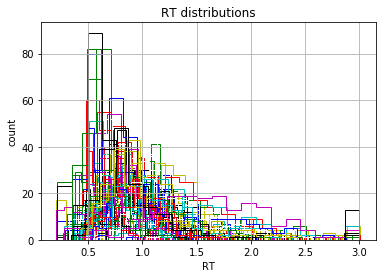

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dat_M_match.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('distribution.pdf')

In [6]:
nsample = 10000  # number of sampling
nburn   = 1000     # number of burn

# dateToday = str(date.today())  # replace the code below if you prefer using the actual date
dateToday = 'final' # using final in the saved file name

#### Model 1

In [7]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

dbname = "M_match_m1_" 
M_match_m1 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','Matching'],'t':['Label','Matching']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m1.find_starting_values()
M_match_m1.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m1.save(dbname)
print("M_match_m1_selfie DIC: %f" %M_match_m1.dic) # DIC;15967.964565

 [-----------------100%-----------------] 10001 of 10000 complete in 31057.3 secM_match_m1_selfie DIC: 15967.964565


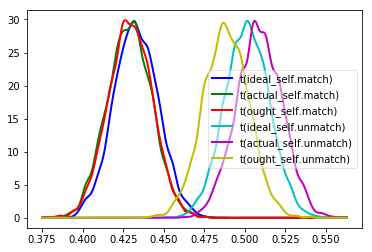

In [14]:
t_idealself_ma,t_actualself_ma,t_oughtself_ma,t_idealself_mis,t_actualself_mis,t_oughtself_mis=M_match_m1.nodes_db.node[['t(ideal_self.match)','t(actual_self.match)','t(ought_self.match)','t(ideal_self.unmatch)','t(actual_self.unmatch)','t(ought_self.unmatch)']]
hddm.analyze.plot_posterior_nodes([t_idealself_ma,t_actualself_ma,t_oughtself_ma,t_idealself_mis,t_actualself_mis,t_oughtself_mis])

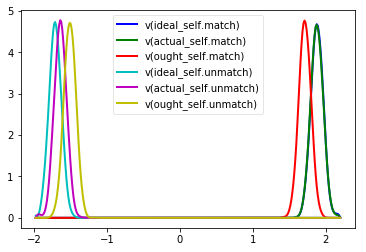

In [15]:
v_idealself_ma,v_actualself_ma,v_oughtself_ma,v_idealself_mis,v_actualself_mis,v_oughtself_mis=M_match_m1.nodes_db.node[['v(ideal_self.match)','v(actual_self.match)','v(ought_self.match)','v(ideal_self.unmatch)','v(actual_self.unmatch)','v(ought_self.unmatch)']]
hddm.analyze.plot_posterior_nodes([v_idealself_ma,v_actualself_ma,v_oughtself_ma,v_idealself_mis,v_actualself_mis,v_oughtself_mis])

In [18]:
from kabuki.analyze import check_geweke
print check_geweke(M_match_m1)

AssertionError: Chain of knode_name          a_std
stochastic           True
observed            False
subj                False
node                a_std
tag                    ()
depends                []
hidden              False
subj_idx              NaN
Matching              NaN
Label                 NaN
Shape                 NaN
nblock                NaN
TrialID               NaN
response              NaN
stim                  NaN
rt                    NaN
mean             0.381239
std             0.0312847
2.5q             0.326679
25q              0.359539
50q              0.378577
75q              0.400775
97.5q            0.448566
mc err        0.000495117
map              0.168508
Name: a_std, dtype: object not properly converged

#### Model 2

In [8]:
dbname = "M_match_m2_" 
M_match_m2 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','Matching'],'t':['Label','Matching'],'a':['Label']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m2.find_starting_values()
M_match_m2.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m2.save(dbname)
print("M_match_m2_selfie DIC: %f" %M_match_m2.dic) # DIC: 15974.275909

 [-----------------100%-----------------] 10001 of 10000 complete in 33242.6 secM_match_m2_selfie DIC: 15974.275909


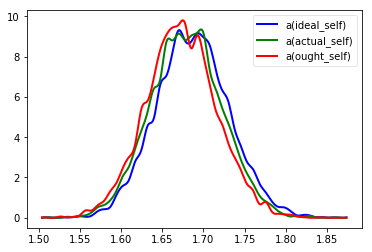

In [9]:
a_idealself_ma,a_actualself_ma,a_oughtself_ma=M_match_m2.nodes_db.node[['a(ideal_self)','a(actual_self)','a(ought_self)']]
hddm.analyze.plot_posterior_nodes([a_idealself_ma,a_actualself_ma,a_oughtself_ma])

In [10]:
print "P_(a_idealself_ma <a_oughtself_ma)=",(a_idealself_ma.trace() <a_oughtself_ma.trace()).mean()
print "P_(a_idealself_ma <a_actualself_ma)=",(a_idealself_ma.trace() <a_actualself_ma.trace()).mean()
print "P_(a_oughtself_ma <a_actualself_ma)=",(a_oughtself_ma.trace() <a_actualself_ma.trace()).mean()

P_(a_idealself_ma <a_oughtself_ma)= 0.4121111111111111
P_(a_idealself_ma <a_actualself_ma)= 0.455
P_(a_oughtself_ma <a_actualself_ma)= 0.5428888888888889


In [16]:
print "P_(v_idealself_ma <v_oughtself_ma)=",(v_idealself_ma.trace() <v_oughtself_ma.trace()).mean()
print "P_(v_idealself_ma <v_actualself_ma)=",(v_idealself_ma.trace() <v_actualself_ma.trace()).mean()
print "P_(v_oughtself_ma <v_actualself_ma)=",(v_oughtself_ma.trace() <v_actualself_ma.trace()).mean()
print "P_(t_idealself_ma <t_oughtself_ma)=",(t_idealself_ma.trace() <t_oughtself_ma.trace()).mean()
print "P_(t_idealself_ma <t_actualself_ma)=",(t_idealself_ma.trace() <t_actualself_ma.trace()).mean()
print "P_(t_oughtself_ma <t_actualself_ma)=",(t_oughtself_ma.trace() <t_actualself_ma.trace()).mean()

P_(v_idealself_ma <v_oughtself_ma)= 0.07122222222222223
P_(v_idealself_ma <v_actualself_ma)= 0.4928888888888889
P_(v_oughtself_ma <v_actualself_ma)= 0.9284444444444444
P_(t_idealself_ma <t_oughtself_ma)= 0.4256666666666667
P_(t_idealself_ma <t_actualself_ma)= 0.41855555555555557
P_(t_oughtself_ma <t_actualself_ma)= 0.49244444444444446


In [17]:
from kabuki.analyze import check_geweke
print check_geweke(M_match_m2)

AssertionError: Chain of knode_name                 a
stochastic              True
observed               False
subj                   False
node          a(actual_self)
tag           (actual_self,)
depends              [Label]
hidden                 False
subj_idx                 NaN
Matching                 NaN
Label            actual_self
Shape                    NaN
nblock                   NaN
TrialID                  NaN
response                 NaN
stim                     NaN
rt                       NaN
mean                 1.67936
std                0.0422537
2.5q                 1.59782
25q                  1.65107
50q                   1.6791
75q                  1.70714
97.5q                1.76238
mc err           0.000671975
map                  1.37289
Name: a(actual_self), dtype: object not properly converged

Plotting a(actual_self)
Plotting a(ideal_self)
Plotting a(ought_self)
Plotting a_std
Plotting v(actual_self.match)
Plotting v(actual_self.unmatch)
Plotting v(ideal_self.match)
Plotting v(ideal_self.unmatch)
Plotting v(ought_self.match)
Plotting v(ought_self.unmatch)
Plotting v_std
Plotting t(actual_self.match)
Plotting t(actual_self.unmatch)
Plotting t(ideal_self.match)
Plotting t(ideal_self.unmatch)
Plotting t(ought_self.match)
Plotting t(ought_self.unmatch)
Plotting t_std
Plotting z
Plotting z_std


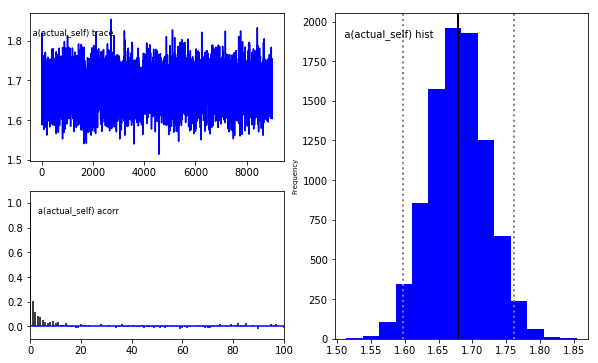

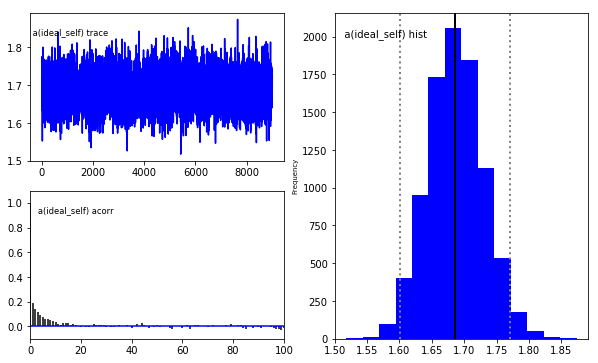

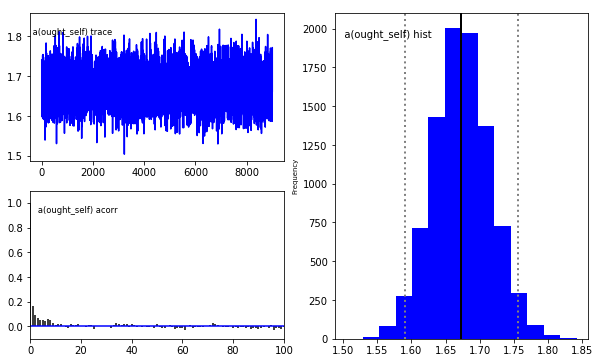

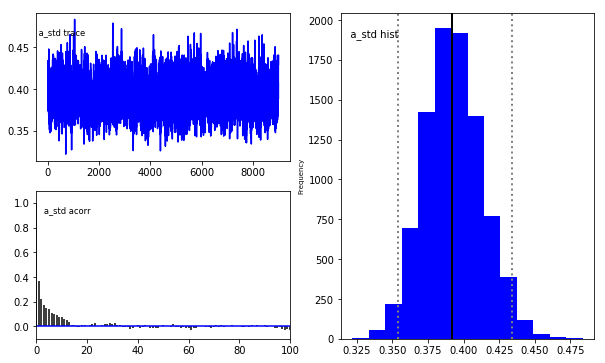

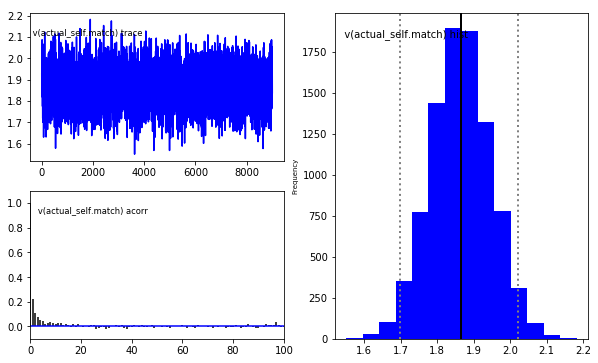

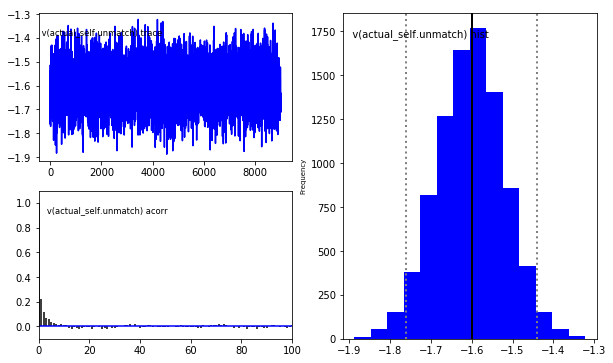

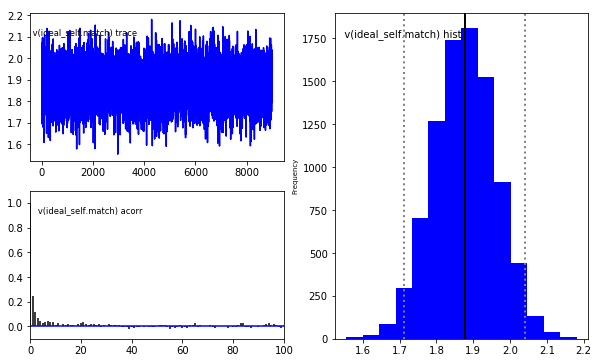

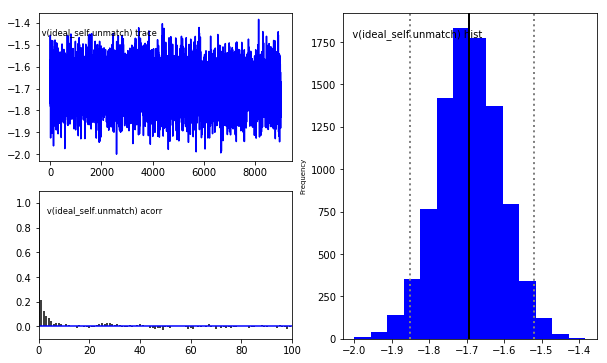

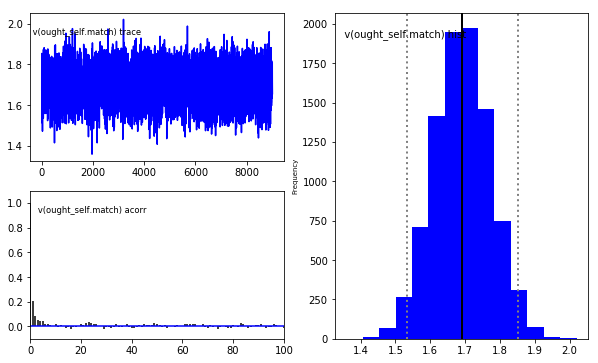

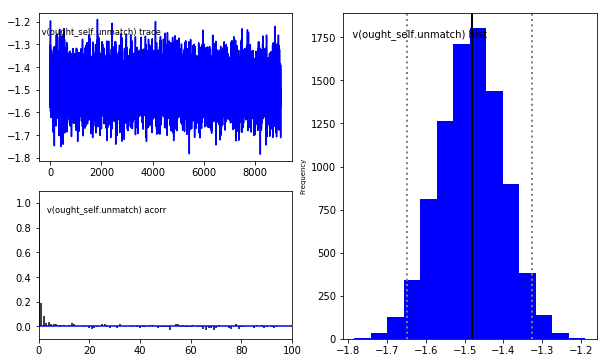

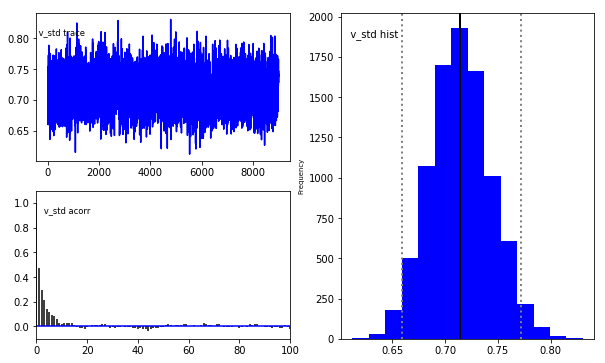

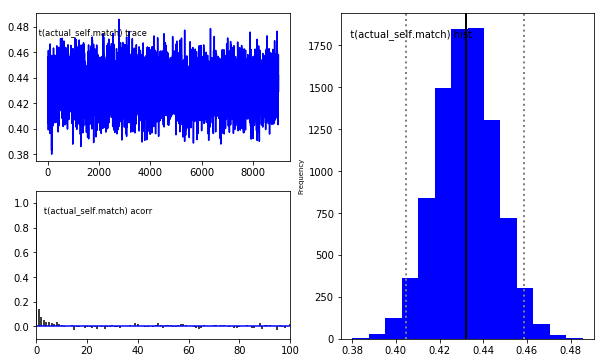

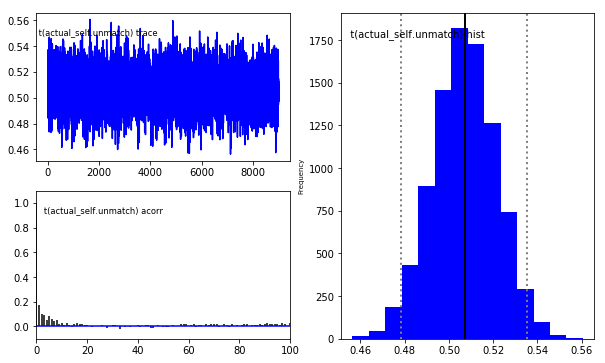

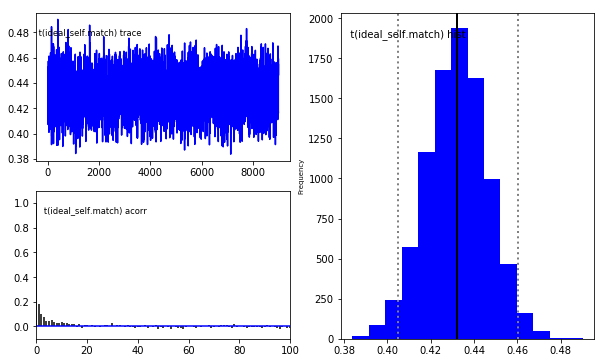

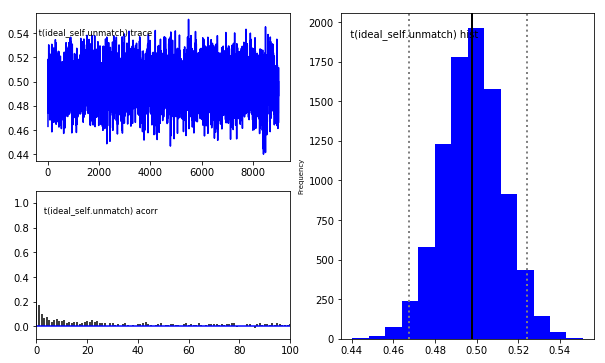

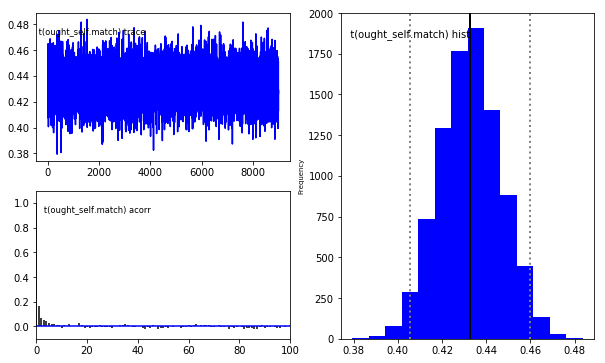

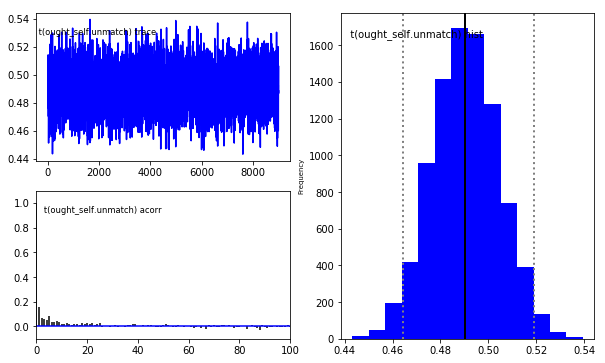

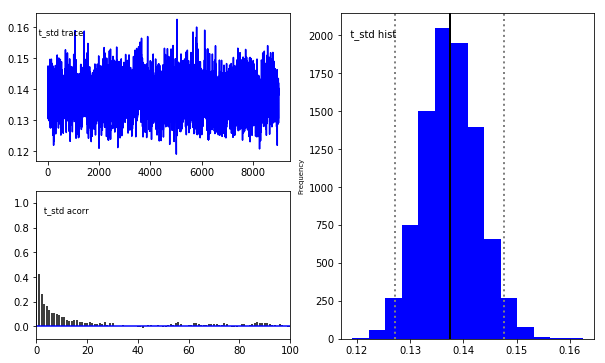

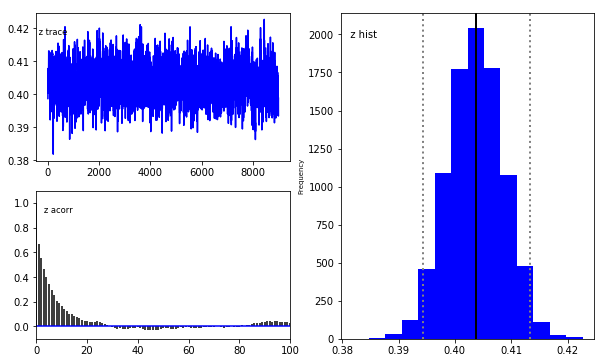

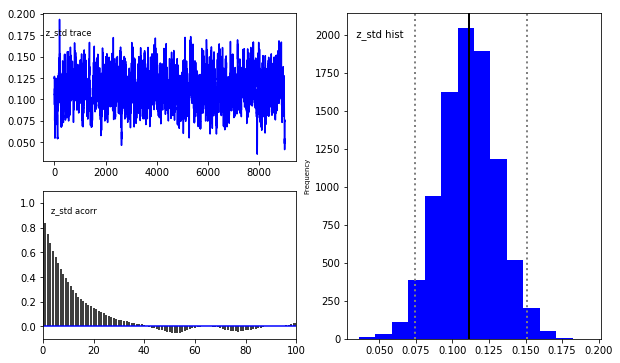

In [19]:
M_match_m2.plot_posteriors()

In [ ]:
dbname = "M_match_m3_" 
M_match_m3 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','Matching'],'t':['Label','Matching'],'a':['Label']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m3.find_starting_values()
M_match_m3.sample(10000, burn=5000,thin=5, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m3.save(dbname)
print("M_match_m3_selfie DIC: %f" %M_match_m3.dic) #

 [-----------------45%                  ] 4543 of 10000 complete in 15370.3 sec